In [1]:
# imports

import os
import sys
import networkx as nx
from pycausal.pycausal import pycausal

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [2]:
aitia = App()

In [13]:
feature_selection_list = []
feature_selection_list.append(aitia.feature_selection.LINEAR_REGRESSION)
feature_selection_list.append(aitia.feature_selection.RANDOM_FOREST)

In [14]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [15]:
pc = pycausal()
pc.start_vm()

In [16]:
hepar2_df = aitia.data.hepar2_10k_data()

In [7]:
target_str_dot = aitia.data.hepar2_graph()

In [17]:
results, summary = aitia.run_analysis( hepar2_df,
                                       target_graph_str=target_str_dot,
                                       n_features=30,
                                       feature_selection_list=feature_selection_list,
                                       algorithm_list=algorithm_list,
                                       pc=pc)

Running causal discovery on features selected by LINEAR_REGRESSION
There are 2 latent edges in the reduced dataset
Running causal discovery using PC
Running causal discovery using RFCI-continuous
Completed causal discovery.
Running causal discovery on features selected by RANDOM_FOREST
There are 0 latent edges in the reduced dataset
Running causal discovery using PC
Running causal discovery using RFCI-continuous
Completed causal discovery.
Completed analysis.


In [20]:
from IPython.display import display, HTML

display(HTML(summary.to_html()))

,causal algorithm,feature selection method,AUPR,SHD
0,PC,LINEAR_REGRESSION,0.012551,130
1,RFCI-continuous,LINEAR_REGRESSION,0.012551,130
2,PC,RANDOM_FOREST,0.012551,128
3,RFCI-continuous,RANDOM_FOREST,0.012551,128


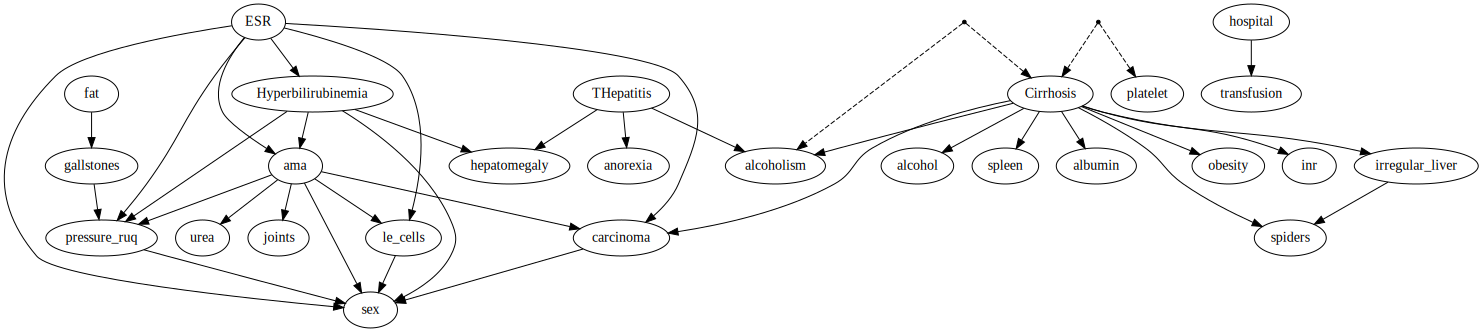

In [20]:
results[1].causal_graph_with_latent_edges.draw()

In [21]:
results[1].latent_edges

[('Cirrhosis', 'platelet'), ('Cirrhosis', 'alcoholism')]

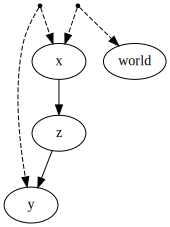

In [32]:
from causalgraphicalmodels import CausalGraphicalModel
dag_with_latent_variables = CausalGraphicalModel(
    nodes=["x", "y", "z"],
    edges=[
        ("x", "z"),
        ("z", "y"),
    ],
    latent_edges=[
        ("x", "y"),
        ("world", "x"),
    ]
)

dag_with_latent_variables.draw()

['Bob', 'Sally', 'Charlie']
[('Bob', 'Lisa')]


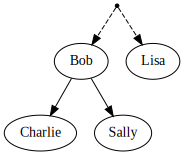

In [3]:
g = nx.Graph()
g.add_edge("Bob", "Sally")
g.add_edge("Charlie", "Bob")
print(g.nodes())
aitia.graph_util.get_causal_graph_with_latent_edges(g, [("Bob", "Lisa"), ("Vincent", "Shrek")]).draw()